# 06_UAV_Comparison
In diesem Jupyter Notebook werden Statistiken und Visualisierungen aus Daten der Punktwolken und der Metashape Reports generiert.

Die Daten basieren auf Bildern folgender Aufnahmedaten und UAV's:

- DJI Phantom 4 Pro V2 (24.03.2025)
- DJI Mini 3 Pro (26.03.2025)

### Import der Libraries

In [1]:
import pandas as pd
import glob
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import laspy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import re
import traceback

### Definition der Grundlagedaten

In [2]:
# CSV-Verzeichnis
csv_dir = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\CSV"
print("Daten in CSV-Verzeichnis:", os.listdir(csv_dir))

# # PointCloud-Verzeichnis auf HDD
# pc_hdd_dir = "F:\\530_PointClouds_UAV"
# print("Daten in PointCloud-Verzeichnis (HDD):", os.listdir(pc_hdd_dir))

# PointCloud-Verzeichnis 
pc_dir = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud"
print("Daten in PointCloud-Verzeichnis:", os.listdir(pc_dir))


Daten in CSV-Verzeichnis: ['Vergleich_DJIMini3Pro_DJIPhantom4ProV2.csv']
Daten in PointCloud-Verzeichnis: []


## 1. Analyse Report Data aus Metashape
Für die folgenden Unterkapitel werden Metadaten aus Metashape verwendet. Diese Metadaten bestehen aus Berechnungsparametern oder berechneten Anzahl Punkten oder Filtering Tresholds. Im Kapitel 1.2 und Kapitel 1.3 werden vorallem die Root Mean Square Error-Werte (RSME-Werte) für die Visualisierungen verwendet.

### 1.1 Import der CSV-Daten
Prüfung des CSV-Imports

In [15]:
# Laden des CSV Files
csv_path = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\CSV\\Vergleich_DJIMini3Pro_DJIPhantom4ProV2.csv"

# Alle CSVs einlesen und in einer Liste speichern
csv_file = pd.read_csv(csv_path)

# Vorschau
display(HTML(csv_file.head(2).to_html(max_cols=200, notebook=True)))

,UAV_ID,Datum,Drohnenpilot,Anzahl Ringe,Nadir ? [J/N],Anzahl Bilder,Format [H/Q],Windböhen ? [J/N],Accuracy,Key Point Limit,Tie Point Limit,Excl. Stationary tie pts.,guided img matching,adaptive model fitting,Start Tie Points,Automatic Filtering,manual Filtering,Reprojection error,Reconstruction uncertainty,Image count,Projection accuracy,Anzahl Control Points,Control Points X error [mm],Control Points Y error [mm],Control Points Z error [mm],Control Points XY error [mm],Control Points Total RMSE [mm],Control Points Total RMSE [pix],Anzahl Check Points,Check Points X error [mm],Check Points Y error [mm],Check Points Z error [mm],Check Points XY error [mm],Check Points Total RMSE [mm],Check Points Total RMSE [pix]
0,DJIMini3Pro,26.03.2025,namp,7,J,444,H,N,Highest,60 K,-,J,N,J,857 K,615 K,492 K,-,53,-,18,7,4.54,2.42,4.14,5.14,6.60,1.70,4,2.66,11.95,18.15,12.24,21.89,2.29
1,DJIPhantom4ProV2,24.03.2025,namp,12,J,638,Q,N,Highest,60 K,-,J,N,J,857 K,618 K,495 K,-,74,-,21,7,1.71,2.09,2.94,2.70,3.99,0.68,4,4.34,2.47,16.40,5.00,17.14,0.80


### 1.2 Vergleich Root Mean Square Error (RMSE) pro UAV-Modell
Beschreibung der Visualisierung!

C:\Users\st1169519\AppData\Local\Temp\ipykernel_23012\1854039514.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for aufnahme_id, group in csv_file.groupby("UAV_ID"):


KeyError: 'Z_Error_mm'

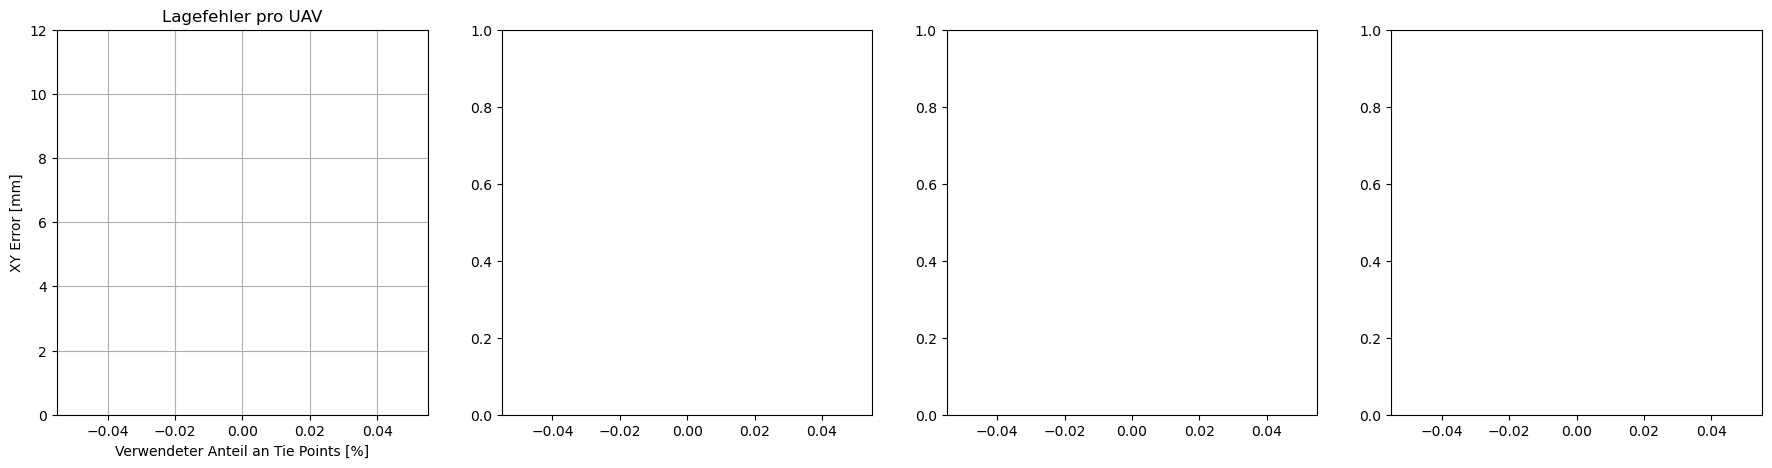

In [23]:
# UAV-Werte als Kategorien
csv_file["UAV_ID"] = pd.Categorical(
    csv_file["UAV_ID"],
    categories=["DJIMini3Pro", "DJIPhantom4ProV2"],
    ordered=True
)

# Attributnamen + Titel + y-Achsenbeschriftung + Achsenskalierung
attributes = [
    ("Control Points XY error [mm]", "Lagefehler pro UAV", "XY Error [mm]", (0, 12)),
    ("Z_Error_mm", "Höhenfehler pro UAV", "Z Error [mm]", (0, 12)),
    ("Total_Error_mm", "3D-Lagefehler pro UAV", "Total Error [mm]", (0, 12)),
    ("Error_pix", "Pixelfehler pro UAV", "Error [pix]", (0, 5)),
]

# Farbzuweisung für UAV_ID
aufnahme_colors = {
    "DJIMini3Pro": "#1f77b4",        # Blau
    "DJIPhantom4ProV2": "#2ca02c",    # Grün
}

# Subplots
fig, axes = plt.subplots(1, 4, figsize=(22, 5), sharex=True)

for ax, (attr, title, ylabel, ylim) in zip(axes, attributes):
    for aufnahme_id, group in csv_file.groupby("UAV_ID"):
        group_sorted = group.sort_values("UAV_ID")
        ax.plot(
            group_sorted["UAV_ID"],
            group_sorted[attr],
            label=aufnahme_id,
            marker="o",
            linewidth=2,
            color=aufnahme_colors[aufnahme_id]
        )
    ax.set_title(title)
    ax.set_ylim(*ylim)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Verwendeter Anteil an Tie Points [%]")
    ax.grid(True)

# Titel für alle Plots
fig.suptitle(
    "Vergleich Root Mean Square Error (RMSE) pro UAV",
    fontsize=18,
    fontweight="bold"
)

# Platzierung der Legende 
handles, labels = axes[0].get_legend_handles_labels()
handles = [plt.Line2D([], [], color='none')] + handles
labels = ["Datenerfassung"] + labels
legend = axes[0].legend(handles, labels, loc="lower left", frameon=True)

# Stil der Legende
legend.get_texts()[0].set_weight("bold")     
legend.get_texts()[0].set_fontsize("medium")

plt.tight_layout()
plt.show()